# Boosted:

Check efficiency plots w.r.t the reference (noringer)

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import array
import root_numpy
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle,TCanvas
import ROOT
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...

Applying ATLAS style settings...

Applying ATLAS style settings...


## 1) Read all files:

In [2]:
output_path = 'output'
mkdir_p(output_path)

In [3]:
# create my chain
chains = [
            Chain( "HLT_e17_lhvloose_nod0_noringer_L1EM15VHI", L1Seed = 'L1_EM15VHI' ),
            Chain( "HLT_e28_lhtight_nod0_noringer_ivarloose", L1Seed = 'L1_EM22VHI' ),
            Chain( "HLT_e60_lhmedium_nod0_noringer_L1EM24VHI", L1Seed = 'L1_EM24VHI' ),
            Chain( "HLT_e140_lhloose_nod0_noringer" , L1Seed = 'L1_EM24VHI' ),
    
            Chain( "HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI", L1Seed = 'L1_EM15VHI' , l2calo_column = 'ringer_v8_vloose'),
            Chain( "HLT_e28_lhtight_nod0_ringer_v8_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_tight' ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_medium'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_loose'),

            Chain( "HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI", L1Seed = 'L1_EM15VHI' , l2calo_column = 'ringer_v9_vloose'),
            Chain( "HLT_e28_lhtight_nod0_ringer_v9_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v9_tight' ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v9_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v9_medium'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v9" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v9_loose'),
            
            Chain( "HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI", L1Seed = 'L1_EM15VHI' , l2calo_column = 'ringer_v10_vloose'),
            Chain( "HLT_e28_lhtight_nod0_ringer_v10_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v10_tight' ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v10_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v10_medium'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v10" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v10_loose'),
    
            Chain( "HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI", L1Seed = 'L1_EM15VHI' , l2calo_column = 'ringer_v12_vloose'),
            Chain( "HLT_e28_lhtight_nod0_ringer_v12_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v12_tight' ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v12_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v12_medium'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v12" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v12_loose'),
    
            Chain( "HLT_e17_lhvloose_nod0_ringer_v13_L1EM15VHI", L1Seed = 'L1_EM15VHI' , l2calo_column = 'ringer_v13_vloose'),
            Chain( "HLT_e28_lhtight_nod0_ringer_v13_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v13_tight' ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v13_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v13_medium'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v13" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v13_loose'),
    
            Chain( "HLT_e17_lhvloose_nod0_ringer_v14_L1EM15VHI", L1Seed = 'L1_EM15VHI' , l2calo_column = 'ringer_v14_vloose'),
            Chain( "HLT_e28_lhtight_nod0_ringer_v14_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v14_tight' ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v14_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v14_medium'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v14" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v14_loose'),
    
            Chain( "HLT_e17_lhvloose_nod0_ringer_v16_L1EM15VHI", L1Seed = 'L1_EM15VHI' , l2calo_column = 'ringer_v16_vloose'),
            Chain( "HLT_e28_lhtight_nod0_ringer_v16_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v16_tight' ),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v16_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v16_medium'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v16" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v16_loose'),
    
]

def emulate( df ):
    for chain in progressbar(chains, prefix='Emulate...'):
        chain.apply(df)

OrderedDict([('L1Seed', 'L1_EM15VHI'),
             ('L2Calo', (14000.0, 'trig_L2_cl_vloose_et12to22')),
             ('L2', 'trig_L2_el_cut_pt15to20'),
             ('EFCalo', 17000.0),
             ('HLT', (17000.0, 'trig_EF_el_lhvloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (25000.0, 'trig_L2_cl_tight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 28000.0),
             ('HLT', (28000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM24VHI'),
             ('L2Calo', (57000.0, 'trig_L2_cl_medium_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt50toInf'),
             ('EFCalo', 60000.0),
             ('HLT', (60000.0, 'trig_EF_el_lhmedium'))])
OrderedDict([('L1Seed', 'L1_EM24VHI'),
             ('L2Calo', (137000.0, 'trig_L2_cl_loose_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt50toInf'),
             ('EFCalo', 140000.0),
             ('HLT', (140000.0, 'trig_EF_el_lhloose'))])
OrderedDic

In [4]:
dpath   = '../data/output/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.dataframe.h5'

In [5]:
data_df = pd.concat( (load_hdf(dpath), 
                      load_hdf('../v8/output/emulation/mc16_table_v8.h5'),
                      load_hdf('../v9/output/emulation/mc16_table_v9.h5'),
                      load_hdf('../v10/output/emulation/mc16_table_v10.h5'),
                      load_hdf('../v12/output/emulation/mc16_table_v12.h5'),
                      load_hdf('../v13/output/emulation/mc16_table_v13.h5'),
                      load_hdf('../v14/output/emulation/mc16_table_v14.h5'),
                      load_hdf('../v16/output/emulation/mc16_table_v16.h5'),

                     ), axis=1)

In [6]:
emulate(data_df)

Emulate...: 100%|██████████| 32/32 [00:00<00:00, 35.56it/s]


In [7]:
data_df.shape

(78914, 289)

## Make plots:

In [64]:
deltaRbins = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16,
              0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.35, 0.40, 0.6]

In [65]:
def hist1d( name, values, bins, density=False ):
    H, _ = np.histogram(values, bins=bins, density=density )
    hist = ROOT.TH1F( name, '', len(bins)-1, array.array('d',bins))
    root_numpy.array2hist(H, hist)
    return hist

def get_profile( df, trigger, bins, target, etcut, pidname=None ):
    if pidname:
        num = df.loc[(df[trigger]==True) & (df['el_et']/1000 >= etcut) & (df['target']==target) &
                   (df[pidname]==True)]['el_TaP_deltaR'].values
        den = df.loc[(df[pidname]==True) & (df['target']==target) & 
                     (df['el_et']/1000 >= etcut)][ 'el_TaP_deltaR'].values
    else:
        num = df.loc[(df[trigger]==True) & (df['el_et']/1000 >= etcut) & (df['target']==target)
                     ][ 'el_TaP_deltaR'].values
        den = df.loc[(df['target']==target) & (df['el_et']/1000 >= etcut)][ 'el_TaP_deltaR'].values  
        
    h_num = hist1d('et_num', num, bins )
    h_den = hist1d('et_den', den, bins )
    h_eff = rpl.hist1d.divide(h_num,h_den)  
    return h_eff

def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

In [93]:
hists = [
        get_profile(data_df, 'L2Calo_e28_lhtight_nod0_noringer_ivarloose',deltaRbins, 1, 23, 'el_lhtight'),
        get_profile(data_df, 'L2Calo_e28_lhtight_nod0_ringer_v8_ivarloose',deltaRbins, 1, 23, 'el_lhtight'),
            get_profile(data_df, 'L2Calo_e28_lhtight_nod0_ringer_v12_ivarloose',deltaRbins, 1, 23, 'el_lhtight'),


        ]

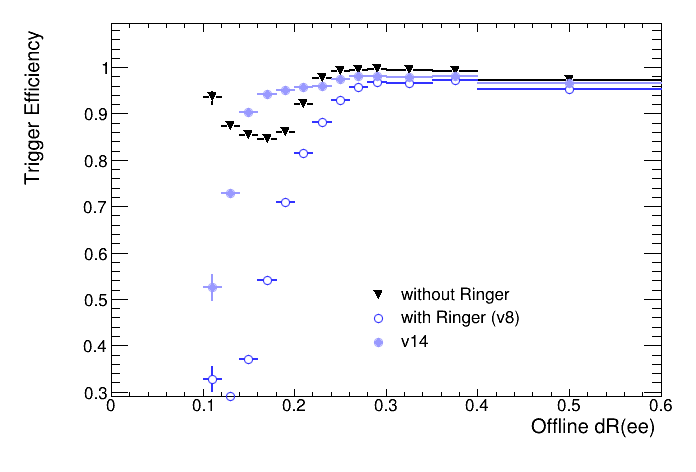

In [94]:
colors = [kBlack,kBlue-4, kBlue-9]
markers = [23, 24, 8]
level = 'L2Calo'
fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline dR(ee)', colors, markers )
#rpl.set_atlas_label(0.2,0.88,'Internal, mc16 #sqrt{s}= 13TeV')
add_legend( 0.51,0.25,['without Ringer','with Ringer (v8)', 'v14'] )
#rpl.add_text( 0.42, 0.45, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
#fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v12_and_noringer_2017_HLT_et.pdf')

<AxesSubplot:>

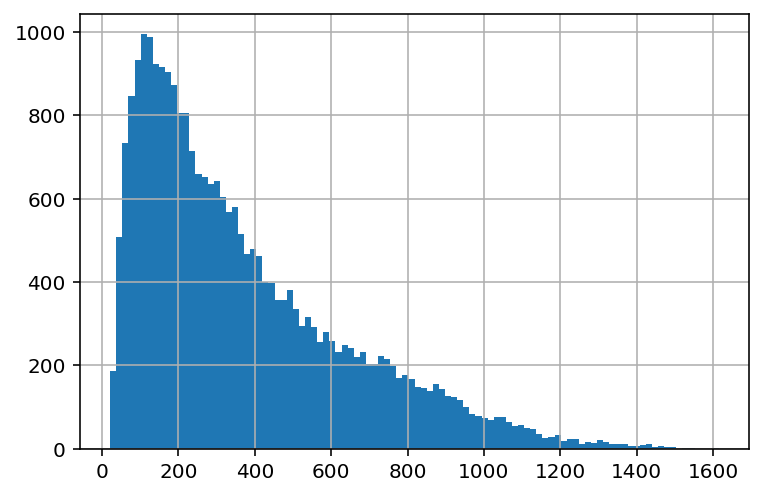

In [105]:
(data_df.loc[(data_df['HLT_e28_lhtight_nod0_ringer_v16_ivarloose']==True)&(data_df['el_lhtight']==True)]['el_et']/1000).hist(bins=100)

In [88]:
et_bins = np.arange(100, 3000, step=10)

In [ ]:
h_et = hist1d( 

In [11]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

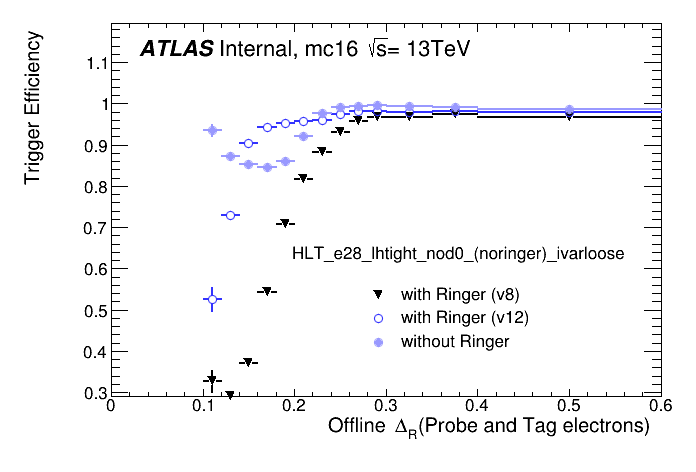

In [76]:
colors = [kBlack,kBlue-4, kBlue-9]
markers = [23, 24, 8]
level = 'L2Calo'
hists = [
            eff_mc16_boosted['v8'].profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', level,'deltaR'),
            eff_mc16_boosted['v12'].profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', level,'deltaR'),
            eff_mc16_boosted['noringer'].profile('HLT_e28_lhtight_nod0_noringer_ivarloose', level,'deltaR'),


            #eff_mc16_boosted['noringer'].profile('HLT_e28_lhtight_nod0_noringer_ivarloose', level,'deltaR'),


        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline #Delta_{R}(Probe and Tag electrons)', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, mc16 #sqrt{s}= 13TeV')
add_legend( 0.51,0.25,['with Ringer (v8)', 'with Ringer (v12)', 'without Ringer'] )
rpl.add_text( 0.42, 0.45, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v12_and_noringer_2017_HLT_et.pdf')